### Import Modules

In [1]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

### Load the data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Reshape and normalize the data

In [3]:
train_images = np.expand_dims(train_images.astype('float32') / 255.0, -1)  # Normalize and reshape
test_images = np.expand_dims(test_images.astype('float32') / 255.0, -1)

### Train-Test Split (stratified)

In [4]:
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.25, random_state=42, stratify=train_labels)

### Model Creation

In [6]:
from keras.layers import Input
model = Sequential([
    Input(shape=(28, 28, 1)),  # Explicit Input layer
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(output_class, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Model Training

In [8]:
model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.8526 - loss: 0.5039 - val_accuracy: 0.9717 - val_loss: 0.0947
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9690 - loss: 0.1060 - val_accuracy: 0.9809 - val_loss: 0.0638
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9760 - loss: 0.0776 - val_accuracy: 0.9844 - val_loss: 0.0547
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9821 - loss: 0.0572 - val_accuracy: 0.9859 - val_loss: 0.0491
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9848 - loss: 0.0479 - val_accuracy: 0.9861 - val_loss: 0.0475
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9870 - loss: 0.0403 - val_accuracy: 0.9873 - val_loss: 0.0434
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9885 - loss: 0.0330 - val_accuracy: 0.9869 - val_loss: 0.0462
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9896 - loss: 0.0316 - 

### Testing the model with a single image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Predicted Label: 0, True Label: 0


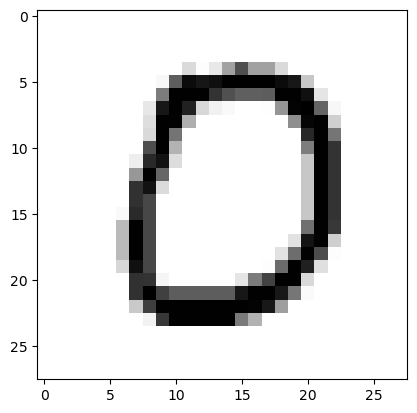

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted Label: 6, True Label: 6


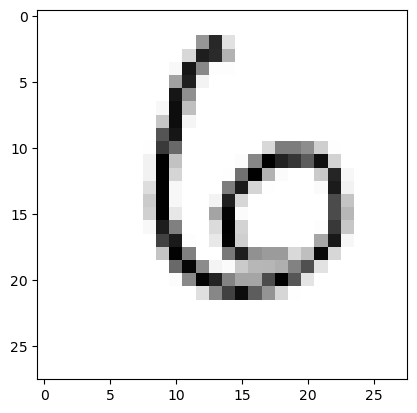

In [9]:
def predict_image(image_index):
    plt.imshow(test_images[image_index].reshape(28,28), cmap='Greys')
    pred = model.predict(test_images[image_index].reshape(1,28,28,1))
    print(f"Predicted Label: {pred.argmax()}, True Label: {test_labels[image_index]}")
    plt.show()

predict_image(10)
predict_image(100)